# Proyecto - PlusTI

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Análisis exploratorio de datos

In [23]:
# Cargar el dataset
df = pd.read_csv("dataset_feature_engineering.csv")
df.head()

,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,first_time_at_merchant,dist_between_client_and_merch,trans_month,trans_day,hour,year,times_shopped_at_merchant,times_shopped_at_merchant_year,times_shopped_at_merchant_month,times_shopped_at_merchant_day
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,...,True,78.773821,1,1,0,2019,5,4,2,1
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,...,True,30.216618,1,1,0,2019,4,4,1,1
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,...,True,108.102912,1,1,0,2019,4,3,1,1
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,...,True,95.685115,1,1,0,2019,1,1,1,1
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,...,True,77.702395,1,1,0,2019,6,1,1,1


In [24]:
# Información general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 35 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   cc_num                           int64  
 1   merchant                         object 
 2   category                         object 
 3   amt                              float64
 4   first                            object 
 5   last                             object 
 6   gender                           object 
 7   street                           object 
 8   city                             object 
 9   state                            object 
 10  zip                              int64  
 11  lat                              float64
 12  long                             float64
 13  city_pop                         int64  
 14  job                              object 
 15  dob                              object 
 16  trans_num                        object 
 17  unix_tim

In [25]:
# Verificar valores nulos
df.isnull().sum()

cc_num                             0
merchant                           0
category                           0
amt                                0
first                              0
last                               0
gender                             0
street                             0
city                               0
state                              0
zip                                0
lat                                0
long                               0
city_pop                           0
job                                0
dob                                0
trans_num                          0
unix_time                          0
merch_lat                          0
merch_long                         0
is_fraud                           0
amt_month                          0
amt_year                           0
amt_month_shopping_net_spend       0
count_month_shopping_net           0
first_time_at_merchant             0
dist_between_client_and_merch      0
t

In [26]:
# Recuento de clases
print("Recuento de clases:")
print(df['is_fraud'].value_counts())

# Porcentaje de clases
print("\nPorcentaje de clases:")
print(df['is_fraud'].value_counts(normalize=True) * 100)

Recuento de clases:
is_fraud
0    1842743
1       9651
Name: count, dtype: int64

Porcentaje de clases:
is_fraud
0    99.478999
1     0.521001
Name: proportion, dtype: float64


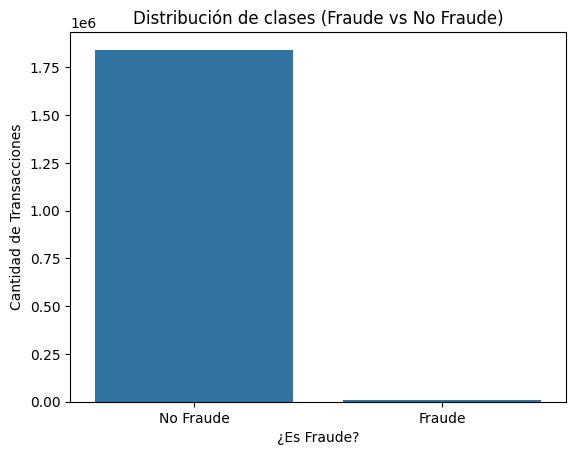

In [27]:
# Visualización
sns.countplot(data=df, x='is_fraud')
plt.title('Distribución de clases (Fraude vs No Fraude)')
plt.xlabel('¿Es Fraude?')
plt.ylabel('Cantidad de Transacciones')
plt.xticks([0, 1], ['No Fraude', 'Fraude'])
plt.show()

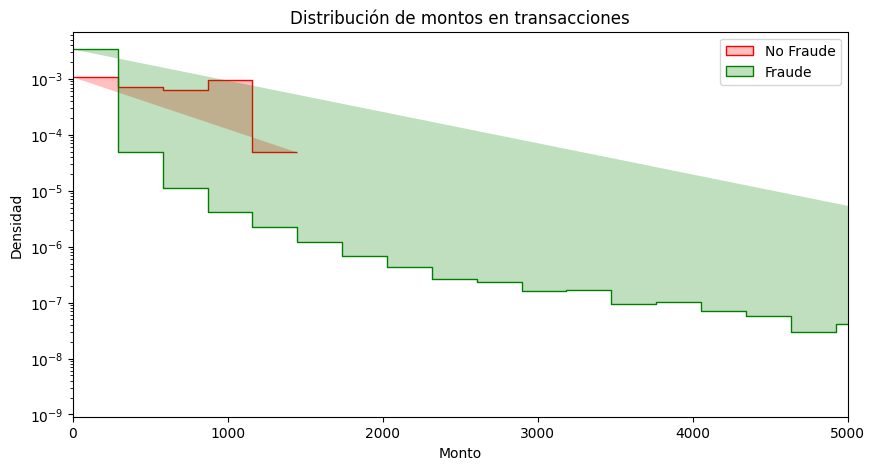

In [28]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='amt', bins=100, hue='is_fraud', log_scale=(False, True), palette=['green', 'red'], element='step', stat='density', common_norm=False)
plt.title('Distribución de montos en transacciones')
plt.xlabel('Monto')
plt.ylabel('Densidad')
plt.xlim(0, 5000)
plt.legend(labels=['No Fraude', 'Fraude'])
plt.show()

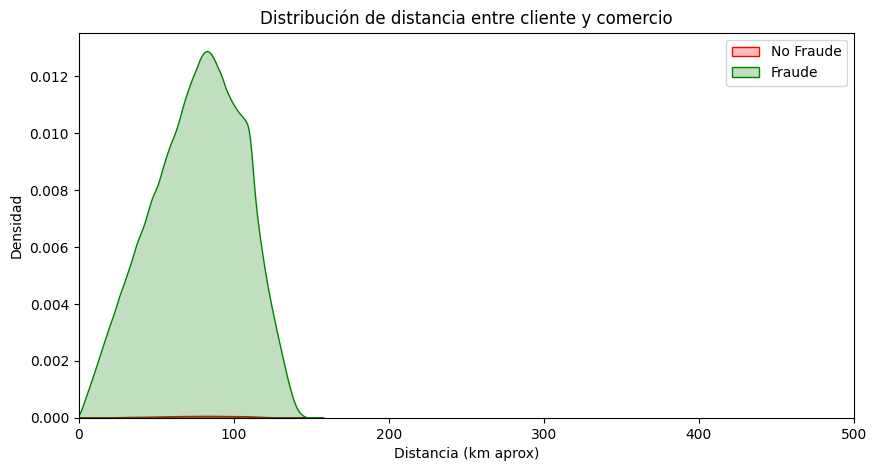

In [29]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=df, x='dist_between_client_and_merch', hue='is_fraud', fill=True, palette=['green', 'red'])
plt.title('Distribución de distancia entre cliente y comercio')
plt.xlabel('Distancia (km aprox)')
plt.ylabel('Densidad')
plt.legend(labels=['No Fraude', 'Fraude'])
plt.xlim(0, 500)
plt.show()

C:\Users\50242\AppData\Local\Temp\ipykernel_8824\1601078828.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraude_por_categoria.values, y=fraude_por_categoria.index, palette='Reds_r')


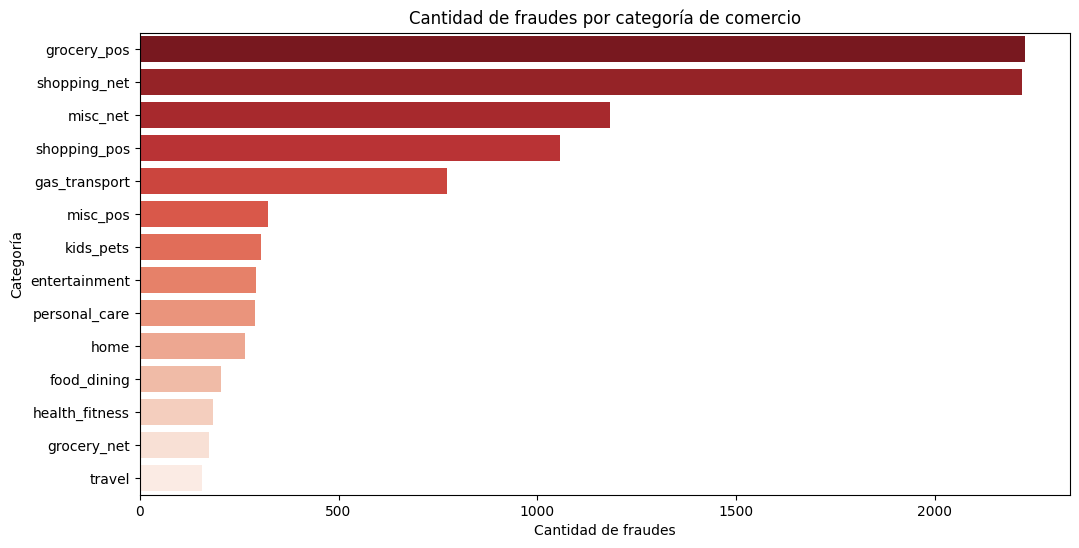

In [30]:
fraude_por_categoria = df[df['is_fraud'] == 1]['category'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=fraude_por_categoria.values, y=fraude_por_categoria.index, palette='Reds_r')
plt.title('Cantidad de fraudes por categoría de comercio')
plt.xlabel('Cantidad de fraudes')
plt.ylabel('Categoría')
plt.show()

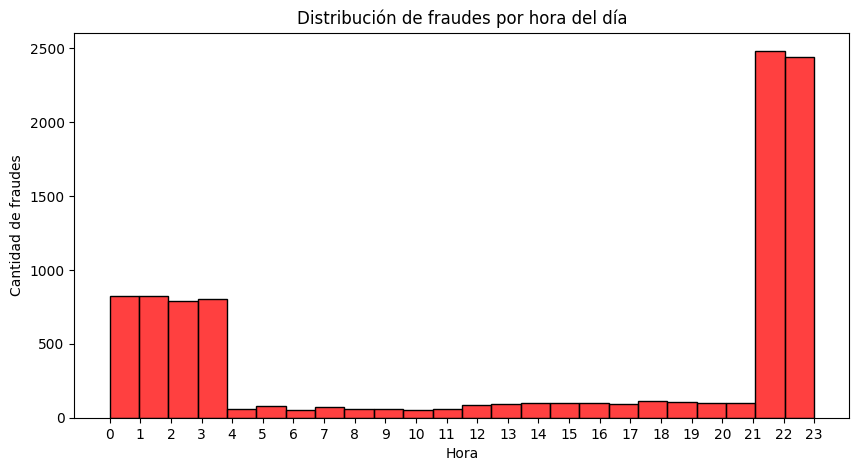

In [31]:
plt.figure(figsize=(10,5))
sns.histplot(data=df[df['is_fraud'] == 1], x='hour', bins=24, color='red', kde=False)
plt.title('Distribución de fraudes por hora del día')
plt.xlabel('Hora')
plt.ylabel('Cantidad de fraudes')
plt.xticks(range(0, 24))
plt.show()

## Ingeniería de variables

In [32]:
# Convertir unix_time a datetime para las fechas
df['transaction_date'] = pd.to_datetime(df['unix_time'], unit='s')

# Identificar la primera transacción registrada para cada comercio
first_transaction_by_merchant = df.groupby('merchant')['transaction_date'].min().reset_index()
first_transaction_by_merchant.rename(columns={'transaction_date': 'first_transaction_date'}, inplace=True)

# Unir esta información al dataframe original
df = df.merge(first_transaction_by_merchant, on='merchant', how='left')

In [33]:
# Calcular días desde la primera transacción del comercio
df['merchant_age_days'] = (df['transaction_date'] - df['first_transaction_date']).dt.days

In [34]:
# Crear una variable booleana que indique si el comercio es nuevo
df['is_new_merchant'] = df['merchant_age_days'] < 30

In [35]:
# Calcular la cantidad de comercios nuevos
new_merchants_count = df['is_new_merchant'].value_counts()
print("\nCantidad de comercios nuevos:")
print(new_merchants_count)


Cantidad de comercios nuevos:
is_new_merchant
False    1800758
True       51636
Name: count, dtype: int64


In [36]:
# Número de fraudes históricos por comercio
fraudes_por_merchant = df.groupby('merchant')['is_fraud'].sum().reset_index()
fraudes_por_merchant.rename(columns={'is_fraud': 'merchant_total_fraudes'}, inplace=True)

# Unir al dataset
df = df.merge(fraudes_por_merchant, on='merchant', how='left')

In [37]:
# Número total de transacciones por comercio
transacciones_por_merchant = df.groupby('merchant').size().reset_index(name='merchant_total_transacciones')

# Unir al dataset
df = df.merge(transacciones_por_merchant, on='merchant', how='left')

# Calcular tasa
df['merchant_fraud_rate'] = df['merchant_total_fraudes'] / df['merchant_total_transacciones']

In [38]:
# Monto de la primera transacción del comercio
primer_monto = df.sort_values('transaction_date').groupby('merchant').first().reset_index()
primer_monto = primer_monto[['merchant', 'amt']]
primer_monto.rename(columns={'amt': 'first_transaction_amt'}, inplace=True)

df = df.merge(primer_monto, on='merchant', how='left')

In [39]:
# Desviación estándar de los montos en los primeros 10 días del comercio
primeros_dias = df[df['merchant_age_days'] <= 10]
variabilidad = primeros_dias.groupby('merchant')['amt'].std().reset_index()
variabilidad.rename(columns={'amt': 'std_amt_first_10_days'}, inplace=True)

df = df.merge(variabilidad, on='merchant', how='left')

In [40]:
# Promedio de distancia en los primeros 10 días del comercio
avg_distancia = primeros_dias.groupby('merchant')['dist_between_client_and_merch'].mean().reset_index()
avg_distancia.rename(columns={'dist_between_client_and_merch': 'avg_distancia_first_10_days'}, inplace=True)

df = df.merge(avg_distancia, on='merchant', how='left')

In [41]:
df.head()

,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,transaction_date,first_transaction_date,merchant_age_days,is_new_merchant,merchant_total_fraudes,merchant_total_transacciones,merchant_fraud_rate,first_transaction_amt,std_amt_first_10_days,avg_distancia_first_10_days
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,...,2012-01-01 00:00:18,2012-01-01 00:00:18,0,True,24,1768,0.013575,4.97,238.345394,72.003855
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,...,2012-01-01 00:00:44,2012-01-01 00:00:44,0,True,35,3528,0.009921,107.23,57.579585,78.709902
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,...,2012-01-01 00:00:51,2012-01-01 00:00:51,0,True,5,2642,0.001893,220.11,90.733688,77.500225
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,...,2012-01-01 00:01:16,2012-01-01 00:01:16,0,True,9,3725,0.002416,45.00,13.135232,90.403195
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,...,2012-01-01 00:03:06,2012-01-01 00:03:06,0,True,7,2290,0.003057,41.96,101.405982,81.247194


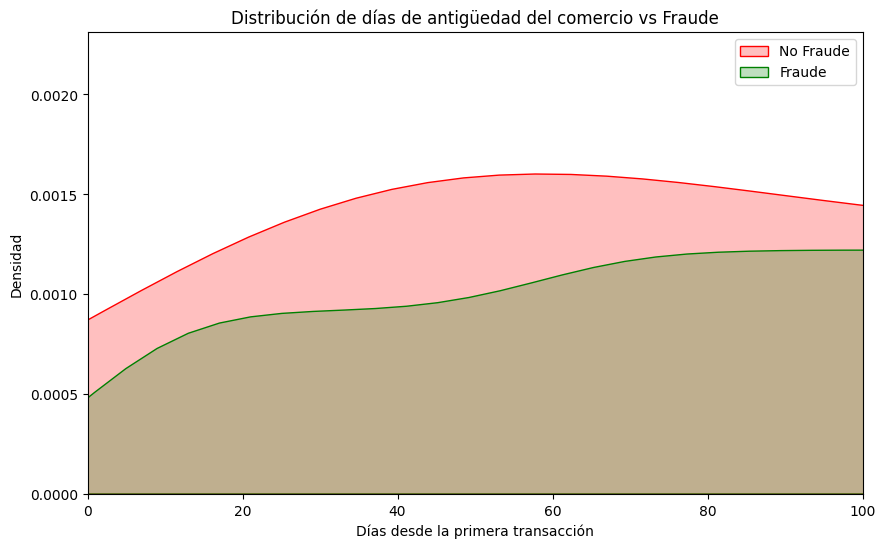

In [42]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x='merchant_age_days', hue='is_fraud', fill=True, common_norm=False, palette=['green', 'red'])
plt.title('Distribución de días de antigüedad del comercio vs Fraude')
plt.xlabel('Días desde la primera transacción')
plt.ylabel('Densidad')
plt.legend(labels=['No Fraude', 'Fraude'])
plt.xlim(0, 100)
plt.show()

C:\Users\50242\AppData\Local\Temp\ipykernel_8824\2916766333.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='is_new_merchant', y='is_fraud', estimator=np.mean, palette=['green', 'red'])


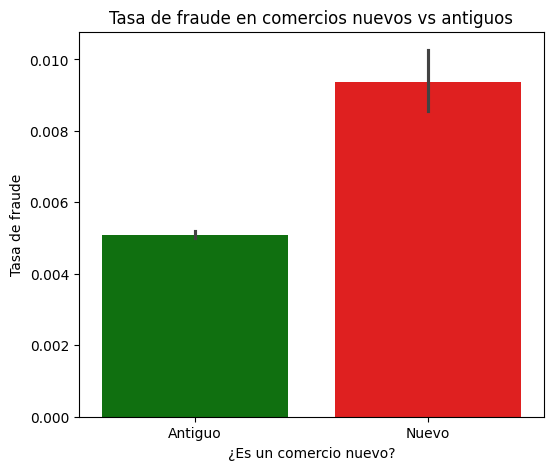

In [43]:
plt.figure(figsize=(6,5))
sns.barplot(data=df, x='is_new_merchant', y='is_fraud', estimator=np.mean, palette=['green', 'red'])
plt.title('Tasa de fraude en comercios nuevos vs antiguos')
plt.xlabel('¿Es un comercio nuevo?')
plt.ylabel('Tasa de fraude')
plt.xticks([0,1], ['Antiguo', 'Nuevo'])
plt.show()

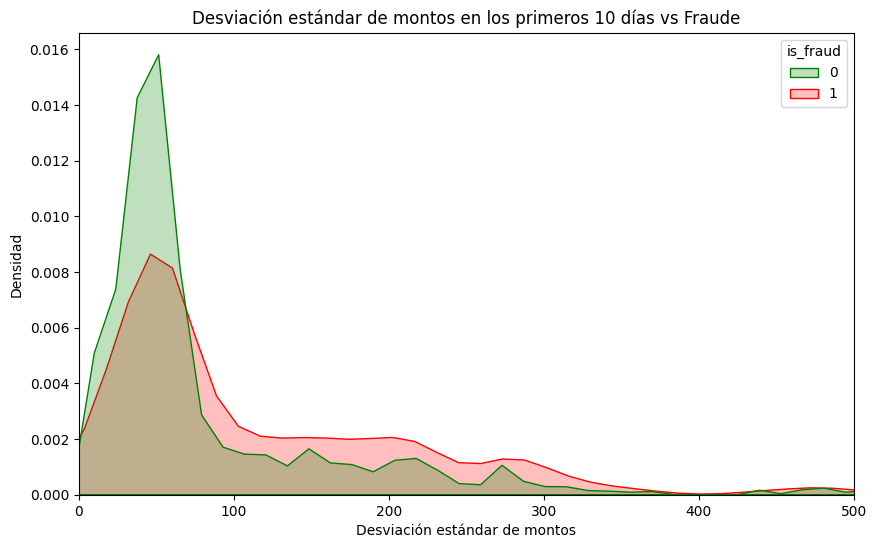

In [44]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x='std_amt_first_10_days', hue='is_fraud', fill=True, common_norm=False, palette=['green', 'red'])
plt.title('Desviación estándar de montos en los primeros 10 días vs Fraude')
plt.xlabel('Desviación estándar de montos')
plt.ylabel('Densidad')
plt.xlim(0, 500)
plt.show()

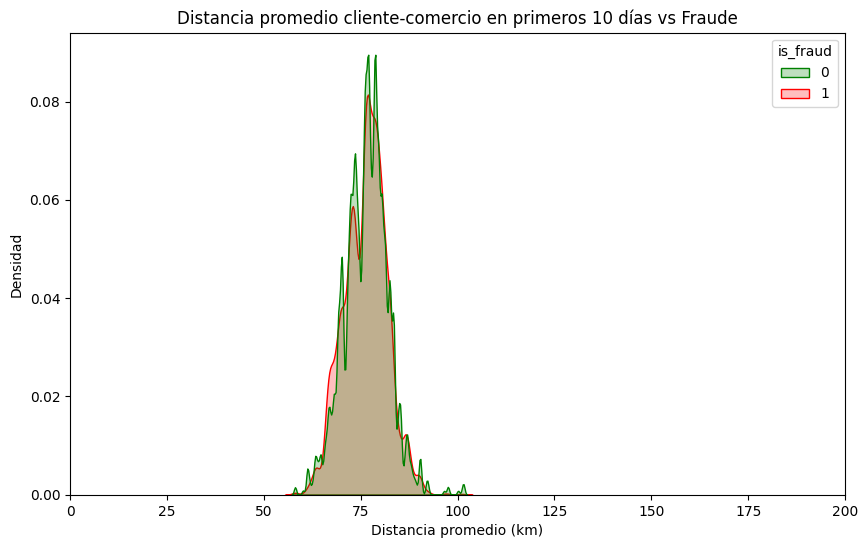

In [45]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x='avg_distancia_first_10_days', hue='is_fraud', fill=True, common_norm=False, palette=['green', 'red'])
plt.title('Distancia promedio cliente-comercio en primeros 10 días vs Fraude')
plt.xlabel('Distancia promedio (km)')
plt.ylabel('Densidad')
plt.xlim(0, 200)
plt.show()

## Implementación del modelo base

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb
from lightgbm import LGBMClassifier, plot_importance
from lightgbm import early_stopping, log_evaluation

In [47]:
df_modelo = df.copy()

# Convertir 'dob' a edad
df_modelo['dob'] = pd.to_datetime(df_modelo['dob'], errors='coerce')
df_modelo['edad'] = (pd.to_datetime('today') - df_modelo['dob']).dt.days // 365
df_modelo.drop(columns='dob', inplace=True)

# Codificar 'category' y 'job'
le_category = LabelEncoder()
le_job = LabelEncoder()

df_modelo['category'] = le_category.fit_transform(df_modelo['category'].astype(str))
df_modelo['job'] = le_job.fit_transform(df_modelo['job'].astype(str))

In [48]:
# Eliminar columnas no numéricas o irrelevantes
columnas_eliminar = [
    'cc_num', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'trans_num', 'unix_time', 'transaction_date', 
    'first_transaction_date', 'merchant'
]

df_modelo['transaction_date'] = pd.to_datetime(df_modelo['transaction_date'])
df_modelo['mes_anio'] = df_modelo['transaction_date'].dt.to_period('M')
train_data = df_modelo[df_modelo['mes_anio'] < '2013-12']
test_data = df_modelo[df_modelo['mes_anio'] == '2013-12']

X_train = train_data.drop(columns=columnas_eliminar + ['is_fraud', 'mes_anio'])
y_train = train_data['is_fraud']
X_test = test_data.drop(columns=columnas_eliminar + ['is_fraud', 'mes_anio'])
y_test = test_data['is_fraud']

In [ ]:
# Inicializar el modelo
modelo_lgbm = LGBMClassifier(
    objective='binary',
    boosting_type='gbdt',
    random_state=42,
    n_estimators=1000
)

In [50]:
# Entrenar el modelo con callbacks
modelo_lgbm.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    eval_metric='auc',
    callbacks=[
        early_stopping(stopping_rounds=50),
        log_evaluation(period=100)
    ]
)

[LightGBM] [Info] Number of positive: 9393, number of negative: 1703463
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.130200 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4606
[LightGBM] [Info] Number of data points in the train set: 1712856, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.005484 -> initscore=-5.200454
[LightGBM] [Info] Start training from score -5.200454
Training until validation scores don't improve for 50 rounds
[100]	training's auc: 0.995247	training's binary_logloss: 0.00953363	valid_1's auc: 0.989516	valid_1's binary_logloss: 0.00576278
[200]	training's auc: 0.997442	training's binary_logloss: 0.00624309	valid_1's auc: 0.995299	valid_1's binary_logloss: 0.00395016
[300]	training's auc: 0.998295	training's binary_logloss: 0.00494395	valid_1's auc: 0.99578	valid_1's binary_logloss: 0.00323155
[400]	training's auc: 0.99889	training's binary_loglo

LGBMClassifier(colsample_bytree=0.8, learning_rate=0.01, max_depth=7,
               min_child_samples=30, n_estimators=1000, num_leaves=64,
               objective='binary', random_state=42, reg_alpha=1.0,
               reg_lambda=1.0, subsample=0.7)

In [51]:
# Predicciones
y_pred_proba = modelo_lgbm.predict_proba(X_test)[:, 1]
y_pred = modelo_lgbm.predict(X_test)

In [52]:
# Métricas generales
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred, digits=4))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_proba):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")


Reporte de clasificación:
              precision    recall  f1-score   support

           0     0.9995    0.9999    0.9997    139280
           1     0.9151    0.7519    0.8255       258

    accuracy                         0.9994    139538
   macro avg     0.9573    0.8759    0.9126    139538
weighted avg     0.9994    0.9994    0.9994    139538

Confusion Matrix:
[[139262     18]
 [    64    194]]
AUC-ROC: 0.9975
F1 Score: 0.8255


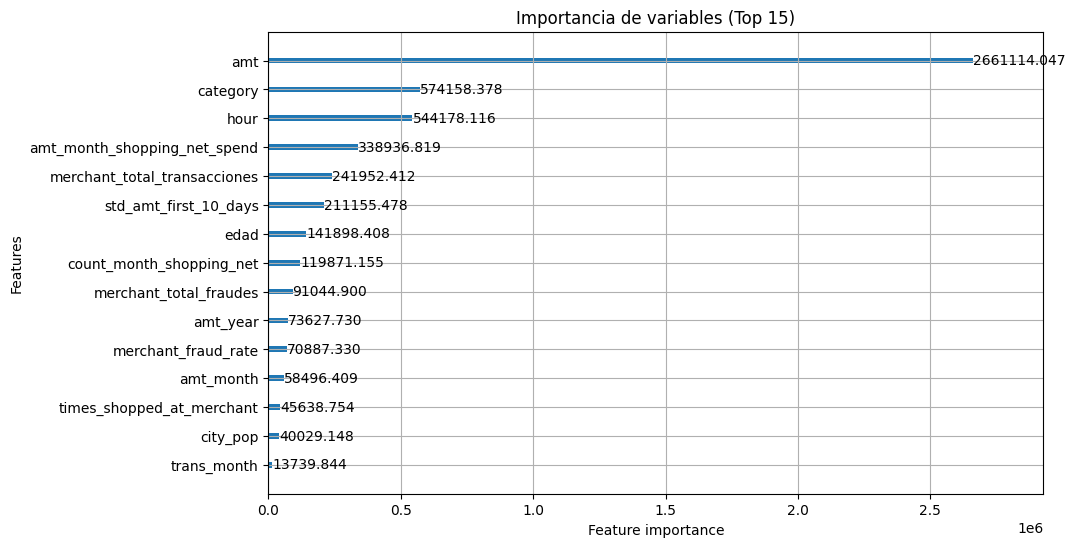

In [53]:
# Importancia de variables
plot_importance(modelo_lgbm, max_num_features=15, importance_type='gain', figsize=(10,6))
plt.title('Importancia de variables (Top 15)')
plt.show()

## Definición de métricas personalizadas

In [109]:
import lightgbm as lgb
import optuna
from sklearn.metrics import f1_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split

c:\Users\50242\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [110]:
df_modelo['transaction_date'] = pd.to_datetime(df_modelo['transaction_date'])
df_modelo['mes_anio'] = df_modelo['transaction_date'].dt.to_period('M')

train_data = df_modelo[df_modelo['mes_anio'] < '2013-12']
test_data = df_modelo[df_modelo['mes_anio'] == '2013-12']

X_train_full = train_data.drop(columns=columnas_eliminar + ['is_fraud', 'mes_anio'])
y_train_full = train_data['is_fraud']
X_test = test_data.drop(columns=columnas_eliminar + ['is_fraud', 'mes_anio'])
y_test = test_data['is_fraud']

# División interna para validación durante búsqueda de hiperparámetros
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full)

In [118]:
def false_positive_penalty_ratio(y_pred, train_data):
    y_true = train_data.get_label()
    y_pred_binary = (y_pred >= 0.5).astype(int)

    TP = ((y_pred_binary == 1) & (y_true == 1)).sum()
    FP = ((y_pred_binary == 1) & (y_true == 0)).sum()
    
    if TP == 0:
        metric_value = float('inf')
    else:
        metric_value = (TP + FP) / TP
    
    return 'false_positive_penalty_ratio', metric_value, False

In [112]:
def balanced_metric(y_pred, train_data):
    y_true = train_data.get_label()
    y_pred_binary = (y_pred >= 0.5).astype(int)

    TP = ((y_pred_binary == 1) & (y_true == 1)).sum()
    FP = ((y_pred_binary == 1) & (y_true == 0)).sum()
    FN = ((y_pred_binary == 0) & (y_true == 1)).sum()

    if TP == 0:
        return 'balanced_fp_penalty', float('inf'), False

    precision_penalty = (TP + FP) / TP
    recall = TP / (TP + FN + 1e-15)

    metric_value = precision_penalty + (1 - recall)
    return 'balanced_fp_penalty', metric_value, False

In [113]:
def evaluar_modelo(nombre, modelo, X_test, y_test, threshold=0.5):
    y_pred_proba = modelo.predict(X_test)
    y_pred = (y_pred_proba >= threshold).astype(int)

    print(f"\n--- Evaluación: {nombre} ---")
    print("Classification report:")
    print(classification_report(y_test, y_pred, digits=4))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("AUC-ROC:", roc_auc_score(y_test, y_pred_proba))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("Umbral usado:", threshold)

In [119]:
def objective(trial):
    param = {
        'objective': 'binary',
        'metric': 'None',
        'boosting_type': 'gbdt',
        'learning_rate': trial.suggest_float('learning_rate', 0.005, 0.05),
        'num_leaves': trial.suggest_int('num_leaves', 20, 100),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'min_child_samples': trial.suggest_int('min_child_samples', 10, 100),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1, 200),
        'feature_fraction': trial.suggest_float('feature_fraction', 0.6, 1.0),
        'bagging_fraction': trial.suggest_float('bagging_fraction', 0.6, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 10),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.0),
        'verbosity': -1,
        'random_state': 42
    }

    dtrain = lgb.Dataset(X_train, label=y_train)
    dvalid = lgb.Dataset(X_valid, label=y_valid, reference=dtrain)

    model = lgb.train(
        param,
        dtrain,
        valid_sets=[dvalid],
        valid_names=['valid'],
        feval=false_positive_penalty_ratio,
        callbacks=[
            lgb.early_stopping(stopping_rounds=50),
            lgb.log_evaluation(period=100)
        ]
    )

    y_pred = model.predict(X_valid)
    y_pred_binary = (y_pred > 0.5).astype(int)

    return f1_score(y_valid, y_pred_binary)

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

print('Mejores parámetros encontrados:', study.best_params)

[I 2025-05-30 00:37:18,416] A new study created in memory with name: no-name-77b17100-5640-4e8e-b5fb-4e67c491c780


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[11]	valid's false_positive_penalty_ratio: 4.36121


[I 2025-05-30 00:37:23,905] Trial 0 finished with value: 0.3652512998266898 and parameters: {'learning_rate': 0.03014016392305789, 'num_leaves': 46, 'max_depth': 12, 'min_child_samples': 91, 'scale_pos_weight': 176.31031047703402, 'feature_fraction': 0.6912295288245253, 'bagging_fraction': 0.7418306041883062, 'bagging_freq': 10, 'reg_alpha': 0.5672983262557986, 'reg_lambda': 0.7745477182424448}. Best is trial 0 with value: 0.3652512998266898.


Training until validation scores don't improve for 50 rounds
[100]	valid's false_positive_penalty_ratio: 1.8948
Did not meet early stopping. Best iteration is:
[100]	valid's false_positive_penalty_ratio: 1.8948


[I 2025-05-30 00:37:33,943] Trial 1 finished with value: 0.6735990756787984 and parameters: {'learning_rate': 0.04196350155423313, 'num_leaves': 87, 'max_depth': 11, 'min_child_samples': 38, 'scale_pos_weight': 33.611189266673364, 'feature_fraction': 0.7683714275696985, 'bagging_fraction': 0.7603451695220955, 'bagging_freq': 4, 'reg_alpha': 0.08761076101693543, 'reg_lambda': 0.9814780012559411}. Best is trial 1 with value: 0.6735990756787984.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[14]	valid's false_positive_penalty_ratio: 1.51773


[I 2025-05-30 00:37:39,675] Trial 2 finished with value: 0.4124314442413163 and parameters: {'learning_rate': 0.024275428505307395, 'num_leaves': 57, 'max_depth': 6, 'min_child_samples': 60, 'scale_pos_weight': 189.38088137188524, 'feature_fraction': 0.7061437865616745, 'bagging_fraction': 0.9203327562847573, 'bagging_freq': 5, 'reg_alpha': 0.6924141409485198, 'reg_lambda': 0.09553970205437068}. Best is trial 1 with value: 0.6735990756787984.


Training until validation scores don't improve for 50 rounds
[100]	valid's false_positive_penalty_ratio: 5.73658
Did not meet early stopping. Best iteration is:
[100]	valid's false_positive_penalty_ratio: 5.73658


[I 2025-05-30 00:37:46,226] Trial 3 finished with value: 0.2946605141727093 and parameters: {'learning_rate': 0.04821403358826357, 'num_leaves': 60, 'max_depth': 4, 'min_child_samples': 50, 'scale_pos_weight': 138.35812109227052, 'feature_fraction': 0.853798956413753, 'bagging_fraction': 0.8051956089927366, 'bagging_freq': 5, 'reg_alpha': 0.782546983202408, 'reg_lambda': 0.28093888988169036}. Best is trial 1 with value: 0.6735990756787984.


Training until validation scores don't improve for 50 rounds
[100]	valid's false_positive_penalty_ratio: 3.43932
Did not meet early stopping. Best iteration is:
[51]	valid's false_positive_penalty_ratio: 1.35182


[I 2025-05-30 00:37:52,904] Trial 4 finished with value: 0.635286972365624 and parameters: {'learning_rate': 0.012949049730462688, 'num_leaves': 29, 'max_depth': 4, 'min_child_samples': 27, 'scale_pos_weight': 198.52118563270096, 'feature_fraction': 0.6020520653196998, 'bagging_fraction': 0.9024099116478513, 'bagging_freq': 4, 'reg_alpha': 0.6080992539948219, 'reg_lambda': 0.9421894744240542}. Best is trial 1 with value: 0.6735990756787984.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[1]	valid's false_positive_penalty_ratio: inf


[I 2025-05-30 00:37:57,459] Trial 5 finished with value: 0.0 and parameters: {'learning_rate': 0.006532625354934061, 'num_leaves': 89, 'max_depth': 8, 'min_child_samples': 31, 'scale_pos_weight': 133.8649303915356, 'feature_fraction': 0.9257424346113153, 'bagging_fraction': 0.6773220739296583, 'bagging_freq': 6, 'reg_alpha': 0.2584525665369929, 'reg_lambda': 0.148702750251534}. Best is trial 1 with value: 0.6735990756787984.


Training until validation scores don't improve for 50 rounds
[100]	valid's false_positive_penalty_ratio: 5.58749
Did not meet early stopping. Best iteration is:
[100]	valid's false_positive_penalty_ratio: 5.58749


[I 2025-05-30 00:38:05,175] Trial 6 finished with value: 0.3017543859649123 and parameters: {'learning_rate': 0.03854862767976702, 'num_leaves': 21, 'max_depth': 11, 'min_child_samples': 82, 'scale_pos_weight': 150.09856061060006, 'feature_fraction': 0.8123054150322846, 'bagging_fraction': 0.7935489760715133, 'bagging_freq': 5, 'reg_alpha': 0.033637878379728314, 'reg_lambda': 0.7752419804876786}. Best is trial 1 with value: 0.6735990756787984.


Training until validation scores don't improve for 50 rounds
[100]	valid's false_positive_penalty_ratio: 2.49132
Did not meet early stopping. Best iteration is:
[100]	valid's false_positive_penalty_ratio: 2.49132


[I 2025-05-30 00:38:16,028] Trial 7 finished with value: 0.5643376541258299 and parameters: {'learning_rate': 0.049806870838296, 'num_leaves': 86, 'max_depth': 9, 'min_child_samples': 12, 'scale_pos_weight': 196.5071408693434, 'feature_fraction': 0.6639241507688788, 'bagging_fraction': 0.9745289280027274, 'bagging_freq': 9, 'reg_alpha': 0.6623546150386644, 'reg_lambda': 0.41386536128498563}. Best is trial 1 with value: 0.6735990756787984.


Training until validation scores don't improve for 50 rounds
[100]	valid's false_positive_penalty_ratio: 6.92541
Did not meet early stopping. Best iteration is:
[100]	valid's false_positive_penalty_ratio: 6.92541


[I 2025-05-30 00:38:22,917] Trial 8 finished with value: 0.25065017220777397 and parameters: {'learning_rate': 0.03808021639695445, 'num_leaves': 82, 'max_depth': 4, 'min_child_samples': 38, 'scale_pos_weight': 150.16336673081256, 'feature_fraction': 0.9072405829732404, 'bagging_fraction': 0.7712462850452686, 'bagging_freq': 9, 'reg_alpha': 0.44736057396018225, 'reg_lambda': 0.8334306633239457}. Best is trial 1 with value: 0.6735990756787984.


Training until validation scores don't improve for 50 rounds
[100]	valid's false_positive_penalty_ratio: 3.94423
Did not meet early stopping. Best iteration is:
[98]	valid's false_positive_penalty_ratio: 3.942


[I 2025-05-30 00:38:31,837] Trial 9 finished with value: 0.4008047390186655 and parameters: {'learning_rate': 0.03967693116770799, 'num_leaves': 100, 'max_depth': 6, 'min_child_samples': 21, 'scale_pos_weight': 129.09333042531236, 'feature_fraction': 0.8785388706157242, 'bagging_fraction': 0.8254746706510793, 'bagging_freq': 4, 'reg_alpha': 0.18213306038709254, 'reg_lambda': 0.9390484035865296}. Best is trial 1 with value: 0.6735990756787984.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[15]	valid's false_positive_penalty_ratio: 1.0226


[I 2025-05-30 00:38:37,442] Trial 10 finished with value: 0.31593038821954483 and parameters: {'learning_rate': 0.02411517347916962, 'num_leaves': 74, 'max_depth': 10, 'min_child_samples': 63, 'scale_pos_weight': 20.33118557726778, 'feature_fraction': 0.7622380895162885, 'bagging_fraction': 0.6056793925445589, 'bagging_freq': 1, 'reg_alpha': 0.9692841436165462, 'reg_lambda': 0.5840377407979919}. Best is trial 1 with value: 0.6735990756787984.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[44]	valid's false_positive_penalty_ratio: 1


[I 2025-05-30 00:38:43,523] Trial 11 finished with value: 0.0010638297872340426 and parameters: {'learning_rate': 0.009747072302158974, 'num_leaves': 31, 'max_depth': 3, 'min_child_samples': 42, 'scale_pos_weight': 53.066138953985416, 'feature_fraction': 0.6128549422045827, 'bagging_fraction': 0.8832808476819984, 'bagging_freq': 2, 'reg_alpha': 0.40039566305786495, 'reg_lambda': 0.9855884054636169}. Best is trial 1 with value: 0.6735990756787984.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[9]	valid's false_positive_penalty_ratio: 1


[I 2025-05-30 00:38:48,829] Trial 12 finished with value: 0.0010638297872340426 and parameters: {'learning_rate': 0.015731683372617003, 'num_leaves': 44, 'max_depth': 6, 'min_child_samples': 23, 'scale_pos_weight': 80.19082131232815, 'feature_fraction': 0.9839784516913961, 'bagging_fraction': 0.8798718674410225, 'bagging_freq': 7, 'reg_alpha': 0.011051510586241875, 'reg_lambda': 0.6001232041439927}. Best is trial 1 with value: 0.6735990756787984.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[38]	valid's false_positive_penalty_ratio: 1.05912


[I 2025-05-30 00:38:57,977] Trial 13 finished with value: 0.5843439911797134 and parameters: {'learning_rate': 0.01585544628850688, 'num_leaves': 70, 'max_depth': 8, 'min_child_samples': 72, 'scale_pos_weight': 88.08432700281517, 'feature_fraction': 0.7532042291249189, 'bagging_fraction': 0.9812148947490915, 'bagging_freq': 3, 'reg_alpha': 0.3431445769306955, 'reg_lambda': 0.9997758843256198}. Best is trial 1 with value: 0.6735990756787984.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[1]	valid's false_positive_penalty_ratio: 1.02242


[I 2025-05-30 00:39:02,029] Trial 14 finished with value: 0.21167536782154722 and parameters: {'learning_rate': 0.030478230028611098, 'num_leaves': 40, 'max_depth': 12, 'min_child_samples': 10, 'scale_pos_weight': 6.292460755511293, 'feature_fraction': 0.6410862792999543, 'bagging_fraction': 0.7045476065448748, 'bagging_freq': 3, 'reg_alpha': 0.9183050239897184, 'reg_lambda': 0.6433723204839424}. Best is trial 1 with value: 0.6735990756787984.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[15]	valid's false_positive_penalty_ratio: 1


[I 2025-05-30 00:39:08,355] Trial 15 finished with value: 0.0010638297872340426 and parameters: {'learning_rate': 0.016785726884921068, 'num_leaves': 97, 'max_depth': 10, 'min_child_samples': 44, 'scale_pos_weight': 51.960227636218576, 'feature_fraction': 0.6045514259349752, 'bagging_fraction': 0.8432169959081303, 'bagging_freq': 7, 'reg_alpha': 0.5465371743433649, 'reg_lambda': 0.8549622401175365}. Best is trial 1 with value: 0.6735990756787984.


Training until validation scores don't improve for 50 rounds
[100]	valid's false_positive_penalty_ratio: 4.22309
Did not meet early stopping. Best iteration is:
[100]	valid's false_positive_penalty_ratio: 4.22309


[I 2025-05-30 00:39:16,833] Trial 16 finished with value: 0.37905024965473283 and parameters: {'learning_rate': 0.042235993414143747, 'num_leaves': 53, 'max_depth': 5, 'min_child_samples': 30, 'scale_pos_weight': 110.89028022953265, 'feature_fraction': 0.7384642055745669, 'bagging_fraction': 0.9393207837563047, 'bagging_freq': 3, 'reg_alpha': 0.25375195770158804, 'reg_lambda': 0.712139154491053}. Best is trial 1 with value: 0.6735990756787984.


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[23]	valid's false_positive_penalty_ratio: 1.0177


[I 2025-05-30 00:39:21,245] Trial 17 finished with value: 0.11334002006018054 and parameters: {'learning_rate': 0.020517092412792256, 'num_leaves': 71, 'max_depth': 3, 'min_child_samples': 53, 'scale_pos_weight': 43.77352901543351, 'feature_fraction': 0.8246820291292418, 'bagging_fraction': 0.6423214070219699, 'bagging_freq': 1, 'reg_alpha': 0.12393882662996003, 'reg_lambda': 0.4247793916535268}. Best is trial 1 with value: 0.6735990756787984.


Training until validation scores don't improve for 50 rounds
[100]	valid's false_positive_penalty_ratio: 3.65994
Did not meet early stopping. Best iteration is:
[100]	valid's false_positive_penalty_ratio: 3.65994


[I 2025-05-30 00:39:29,286] Trial 18 finished with value: 0.4243937232524964 and parameters: {'learning_rate': 0.035741437268980346, 'num_leaves': 23, 'max_depth': 7, 'min_child_samples': 33, 'scale_pos_weight': 71.83318261348828, 'feature_fraction': 0.9974112600823083, 'bagging_fraction': 0.7391841527056903, 'bagging_freq': 4, 'reg_alpha': 0.8380125723641889, 'reg_lambda': 0.8881501181053605}. Best is trial 1 with value: 0.6735990756787984.


Training until validation scores don't improve for 50 rounds
[100]	valid's false_positive_penalty_ratio: 3.633
Did not meet early stopping. Best iteration is:
[100]	valid's false_positive_penalty_ratio: 3.633


[I 2025-05-30 00:39:38,346] Trial 19 finished with value: 0.42667305159822816 and parameters: {'learning_rate': 0.04488541266000466, 'num_leaves': 37, 'max_depth': 9, 'min_child_samples': 22, 'scale_pos_weight': 110.32051652390258, 'feature_fraction': 0.7763533263423378, 'bagging_fraction': 0.8657477159876, 'bagging_freq': 7, 'reg_alpha': 0.637368674041675, 'reg_lambda': 0.7063616224935726}. Best is trial 1 with value: 0.6735990756787984.


Mejores parámetros encontrados: {'learning_rate': 0.04196350155423313, 'num_leaves': 87, 'max_depth': 11, 'min_child_samples': 38, 'scale_pos_weight': 33.611189266673364, 'feature_fraction': 0.7683714275696985, 'bagging_fraction': 0.7603451695220955, 'bagging_freq': 4, 'reg_alpha': 0.08761076101693543, 'reg_lambda': 0.9814780012559411}


In [124]:
params_final = study.best_params
params_final.update({
    'objective': 'binary',
    'metric': 'None',
    'boosting_type': 'gbdt',
    'verbosity': -1,
    'random_state': 42
})

dtrain_full = lgb.Dataset(X_train_full, label=y_train_full)
dtest = lgb.Dataset(X_test, label=y_test, reference=dtrain_full)

### Entrenamiento con Balanced Metric

In [127]:
modelo_balanced = lgb.train(
    params_final,
    dtrain_full,
    num_boost_round=1000,
    valid_sets=[dtrain_full, dtest],
    valid_names=['train', 'valid'],
    feval=balanced_metric,
    callbacks=[
        lgb.early_stopping(stopping_rounds=50),
        lgb.log_evaluation(period=100)
    ]
)

y_test_proba = modelo_balanced.predict(X_test)
thresholds = np.linspace(0, 1, 100)
f1_scores = [f1_score(y_test, (y_test_proba >= t).astype(int)) for t in thresholds]
best_threshold = thresholds[np.argmax(f1_scores)]
print(f"Mejor umbral en test para F1: {best_threshold}")

Training until validation scores don't improve for 50 rounds
[100]	train's balanced_fp_penalty: 1.87975	valid's balanced_fp_penalty: 3.41038
[200]	train's balanced_fp_penalty: 1.38814	valid's balanced_fp_penalty: 1.92231
[300]	train's balanced_fp_penalty: 1.2108	valid's balanced_fp_penalty: 1.61342
[400]	train's balanced_fp_penalty: 1.11466	valid's balanced_fp_penalty: 1.53723
[500]	train's balanced_fp_penalty: 1.06217	valid's balanced_fp_penalty: 1.48566
Early stopping, best iteration is:
[547]	train's balanced_fp_penalty: 1.04163	valid's balanced_fp_penalty: 1.4421
Mejor umbral en test para F1: 0.494949494949495


In [ ]:
evaluar_modelo("Modelo final con búsqueda y umbral optimizado", modelo_balanced, X_test, y_test, threshold=best_threshold)


--- Evaluación: Modelo final con búsqueda y umbral optimizado ---
Classification report:
              precision    recall  f1-score   support

           0     0.9994    0.9998    0.9996    139280
           1     0.8744    0.7016    0.7785       258

    accuracy                         0.9993    139538
   macro avg     0.9369    0.8507    0.8891    139538
weighted avg     0.9992    0.9993    0.9992    139538

Confusion Matrix:
[[139254     26]
 [    77    181]]
AUC-ROC: 0.9929377941484222
F1 Score: 0.7784946236559139
Umbral usado: 0.494949494949495


### Entrenamiento con False Positive Penalty Ratio

In [129]:
modelo_fp_penalty = lgb.train(
    params_final,
    dtrain_full,
    num_boost_round=1000,
    valid_sets=[dtrain_full, dtest],
    valid_names=['train', 'valid'],
    feval=false_positive_penalty_ratio,
    callbacks=[
        lgb.early_stopping(stopping_rounds=50),
        lgb.log_evaluation(period=100)
    ]
)

y_test_proba = modelo_balanced.predict(X_test)
thresholds = np.linspace(0, 1, 100)
f1_scores = [f1_score(y_test, (y_test_proba >= t).astype(int)) for t in thresholds]
best_threshold = thresholds[np.argmax(f1_scores)]
print(f"Mejor umbral en test para F1: {best_threshold}")

Training until validation scores don't improve for 50 rounds
[100]	train's false_positive_penalty_ratio: 1.86729	valid's false_positive_penalty_ratio: 3.26697
[200]	train's false_positive_penalty_ratio: 1.38792	valid's false_positive_penalty_ratio: 1.72464
[300]	train's false_positive_penalty_ratio: 1.2108	valid's false_positive_penalty_ratio: 1.36923
[400]	train's false_positive_penalty_ratio: 1.11466	valid's false_positive_penalty_ratio: 1.26203
[500]	train's false_positive_penalty_ratio: 1.06217	valid's false_positive_penalty_ratio: 1.18333
[600]	train's false_positive_penalty_ratio: 1.02704	valid's false_positive_penalty_ratio: 1.14607
Early stopping, best iteration is:
[583]	train's false_positive_penalty_ratio: 1.03109	valid's false_positive_penalty_ratio: 1.13483
Mejor umbral en test para F1: 0.494949494949495


In [130]:
evaluar_modelo("Modelo final con búsqueda y umbral optimizado", modelo_fp_penalty, X_test, y_test, threshold=best_threshold)


--- Evaluación: Modelo final con búsqueda y umbral optimizado ---
Classification report:
              precision    recall  f1-score   support

           0     0.9994    0.9998    0.9996    139280
           1     0.8768    0.6899    0.7722       258

    accuracy                         0.9992    139538
   macro avg     0.9381    0.8449    0.8859    139538
weighted avg     0.9992    0.9992    0.9992    139538

Confusion Matrix:
[[139255     25]
 [    80    178]]
AUC-ROC: 0.9929066817609055
F1 Score: 0.7722342733188721
Umbral usado: 0.494949494949495
